## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading data

In [2]:
train_transaction = pd.read_csv('/Users/krahman/work/fraud_detection/data/train_transaction.csv')
train_identity = pd.read_csv('/Users/krahman/work/fraud_detection/data/train_identity.csv')
df_raw = train_transaction.merge(train_identity, on='TransactionID', how='left') # merging df
df_eda = df_raw.copy()
df_train = df_raw.copy()
df_features = pd.read_csv('/Users/krahman/work/fraud_detection/saved_files/df_imputed.csv')
df_features = df_features.drop('Unnamed: 0', axis=1)

## Dataframe Head

In [3]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


## Dataframe Info

In [5]:
train_transaction.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
train_identity.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

## Data Quality Check

In [7]:
target = 'isFraud'
col_id = 'TransactionID'
df_feat = df_eda.drop([col_id, target], axis=1)

In [8]:
# How many transactions are in the dataset?
len_df = df_eda.shape[0]
print("Total number of records:", len_df)

# How many duplicate records are in the dataset. 
val_duplicate_records = np.sum(df_eda[col_id].duplicated())
print('Total number of duplicate records:', val_duplicate_records)

# How many features are in the dataset?
total_features = df_feat.shape[1]
print('Total number of features:', total_features)

# What is the fraud rate of the data set?
fraud_rate = df_eda[target].value_counts() / df_eda.shape[0]
val_perc_fraud = round(fraud_rate[1]*100, 3)
val_perc_not_fraud = round(fraud_rate[0]*100, 3)
print("Percentage of Fraudulent Transactions:", val_perc_fraud, "%")
print("Percentage of Non-Fraudulent Transactions:", val_perc_not_fraud, "%")

# How many columns have null values?
df_null = df_feat.isnull().any().value_counts()
val_total_null = df_null[1]
print("Total number of columns with null values:", val_total_null)

# How many columns have more than 50% missing data?
df_null_total = np.sum(df_feat.isnull())
total_null_50_perc = df_null_total[df_null_total > (len_df*.5)].shape[0]
print("Total number of columns with more than 50% missing data:", total_null_50_perc)

Total number of records: 590540
Total number of duplicate records: 0
Total number of features: 432
Percentage of Fraudulent Transactions: 3.499 %
Percentage of Non-Fraudulent Transactions: 96.501 %
Total number of columns with null values: 414
Total number of columns with more than 50% missing data: 214


In [9]:
print("Dataframe info:")
print(df_eda.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None


In [10]:
print("Column data types:")
print(df_eda.dtypes)

Column data types:
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object


## General Statistics of Dataset

In [11]:
df_eda.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [12]:
fraud_summary = df_eda.groupby('isFraud')
fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_groupby.csv')
fraud_summary.mean()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,
0,3.281810e+06,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,117.360098,...,188.113697,14.213882,354.854950,401.133705,364.479400,15.757959,12.802301,328.622269,148.112917,26.452391
1,3.294952e+06,7.690033e+06,149.244779,9547.654164,365.370850,162.368648,191.994328,294.317134,86.286024,174.588854,...,204.991400,14.497189,333.060156,435.838002,410.382629,18.727700,12.786070,340.764988,159.743529,27.716024


## Columns with Null Values

In [13]:
list_null = df_train.isnull().any()
df_null = pd.DataFrame(list_null).reset_index()
df_null

,index,0
0,TransactionID,False
1,isFraud,False
2,TransactionDT,False
3,TransactionAmt,False
4,ProductCD,False
...,...,...
429,id_36,True
430,id_37,True
431,id_38,True
432,DeviceType,True


## Duplicate Values

In [14]:
train_transaction_sum = train_transaction.duplicated().sum()
train_identity_sum = train_identity.duplicated().sum()
print('Training dataframe transaction duplicates: {}'.format(train_transaction_sum))
print('Training dataframe identity duplicates: {}'.format(train_identity_sum))
columns = train_transaction.columns
# print('Train feature columns:\n', list(columns))

Training dataframe transaction duplicates: 0
Training dataframe identity duplicates: 0


### NEXT

In [15]:
fraud_summary = df_train.groupby('isFraud')
fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_groupby.csv')
fraud_summary.mean()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,
0,3.281810e+06,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,117.360098,...,188.113697,14.213882,354.854950,401.133705,364.479400,15.757959,12.802301,328.622269,148.112917,26.452391
1,3.294952e+06,7.690033e+06,149.244779,9547.654164,365.370850,162.368648,191.994328,294.317134,86.286024,174.588854,...,204.991400,14.497189,333.060156,435.838002,410.382629,18.727700,12.786070,340.764988,159.743529,27.716024


In [16]:
df_train.isnull().any()

TransactionID     False
isFraud           False
TransactionDT     False
TransactionAmt    False
ProductCD         False
                  ...  
id_36              True
id_37              True
id_38              True
DeviceType         True
DeviceInfo         True
Length: 434, dtype: bool

## Transaction By Credit Card Company

In [17]:
# Creating dataframe nad filling na values for columns card4 and card6
mode_card4 = df_eda.card4.mode()[0]
df_eda['card4'] = df_eda.card4.fillna(mode_card4)

mode_card6 = df_eda.card6.mode()[0]
df_eda['card6'] = df_eda.card6.fillna(mode_card6)

df_eda_not_fraud = df_eda[df_eda.isFraud==0]
df_eda_fraud = df_eda[df_eda.isFraud==1]

### Not Fraudulent

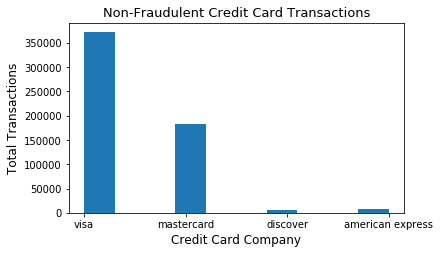

In [18]:
plt.subplots(figsize=(6, 3.5))
plt.hist(df_eda_not_fraud.card4.sort_values(ascending=False))
plt.title("Non-Fraudulent Credit Card Transactions", fontsize=13)
plt.ylabel("Total Transactions", fontsize=12)
plt.xlabel("Credit Card Company", fontsize=12)
plt.show()

### Fraudulent

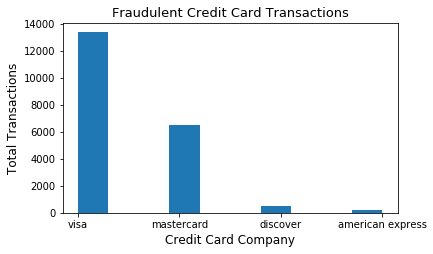

In [19]:
plt.subplots(figsize=(6, 3.5))
plt.hist(df_eda_fraud.card4.sort_values(ascending=False))
plt.title("Fraudulent Credit Card Transactions", fontsize=13)
plt.ylabel("Total Transactions", fontsize=12)
plt.xlabel("Credit Card Company", fontsize=12)
plt.show()

# Transactions By Card Type

#### Creating Dataframes

In [20]:
# Among all fraudulent transactions, do we see more debit or credit card transactions that are fraudulent?
df_card6_not_fraud = df_eda_not_fraud[(df_eda_not_fraud.card6=='credit') 
                                    | (df_eda_not_fraud.card6=='debit')]
df_card6_not_fraud = df_card6_not_fraud.card6.sort_values(ascending=False)
df_card6_fraud = df_eda_fraud.card6.sort_values(ascending=False)

### Transactions By Card Type - Not Fraudulent

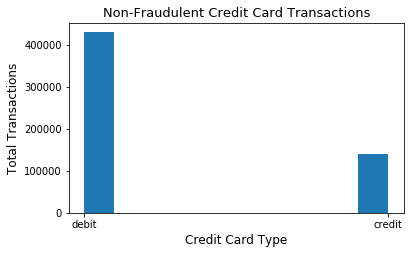

In [21]:
plt.subplots(figsize=(6, 3.5))
plt.hist(df_card6_not_fraud)
plt.title("Non-Fraudulent Credit Card Transactions", fontsize=13)
plt.ylabel("Total Transactions", fontsize=12)
plt.xlabel("Credit Card Type", fontsize=12)
plt.show()

### Transactions By Card Type - Fraudulent

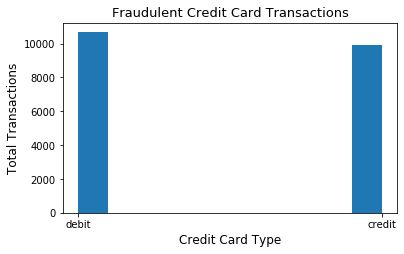

In [22]:
plt.subplots(figsize=(6, 3.5))
plt.hist(df_card6_fraud)
plt.title("Fraudulent Credit Card Transactions", fontsize=13)
plt.ylabel("Total Transactions", fontsize=12)
plt.xlabel("Credit Card Type", fontsize=12)
plt.show()

## Transactions By Email Provider

#### Creating Dataframes 

In [23]:
# filling na
mode_p_emaildomain = df_eda['P_emaildomain'].mode()[0] #del if we decide to go with filling na with 'missing'
df_eda['P_emaildomain'] = df_eda['P_emaildomain'].fillna('missing')
mode_card6 = df_eda['card6'].mode()[0]
df_eda['card6'] = df_eda['card6'].fillna(mode_card6)
df_eda['addr1'] = df_eda['addr1'].fillna(0) # 0 means missing addr1 value

# not fraud dataframe
df_email_notfraud = df_eda[df_eda.isFraud==0].P_emaildomain
df_email_notfraud = df_email_notfraud.value_counts()
df_email_notfraud = df_email_notfraud.reset_index()
df_email_notfraud = df_email_notfraud.rename(columns={'P_emaildomain':'email_notfraud_count',
                                                      'index':'index_email'})

# fraud dataframe
df_email_fraud = df_eda[df_eda.isFraud==1].P_emaildomain
df_email_fraud = df_email_fraud.value_counts()
df_email_fraud = df_email_fraud.reset_index()
df_email_fraud = df_email_fraud.rename(columns={'P_emaildomain':'email_fraud_count',
                                                'index':'index_email'})
# merging not fraud and fraud dataframes
df_email_eda = df_email_notfraud.merge(df_email_fraud, how='left', on='index_email')
df_email_eda = df_email_eda.fillna(0)
df_email_eda['email_total'] = (df_email_eda['email_fraud_count']
                             + df_email_eda['email_notfraud_count'])
df_email_eda['email_percent_fraud'] = df_email_eda['email_fraud_count'] / 20663.0
df_email_eda['email_fraud_ratio'] = (df_email_eda['email_fraud_count'] 
                                   / df_email_eda['email_total'])


# email total dataframe
df_em_total = df_email_eda.sort_values('email_total', ascending=False)
df_em_total = df_em_total.head(10)
df_em_total = df_em_total.sort_values('email_total', ascending=True)
# email fraud percentage dataframe
df_em_perc_fraud = df_email_eda.sort_values('email_percent_fraud', ascending=False)
df_em_perc_fraud = df_em_perc_fraud.head(10)
df_em_perc_fraud = df_em_perc_fraud.sort_values('email_percent_fraud', ascending=True)
# email fraud ratio  dataframe
df_em_ratio = df_email_eda.sort_values('email_fraud_ratio', ascending=False)
df_em_ratio = df_em_perc_fraud.head(10)
df_em_ratio = df_em_perc_fraud.sort_values('email_fraud_ratio', ascending=True)

### Top 10 Email Providers

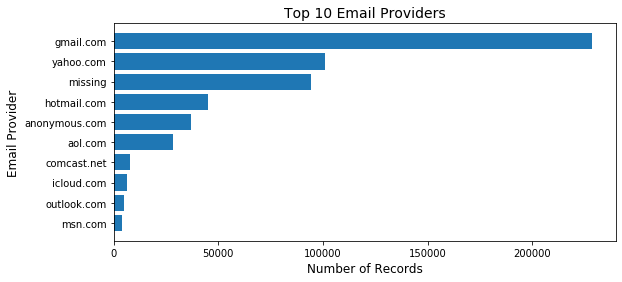

In [24]:
# # email all
# "what we find is that the most common email occurence shows this..."
plt.subplots(figsize=(9, 4))
plt.title('Top 10 Email Providers', fontsize=14)
plt.ylabel('Email Provider', fontsize=12)
plt.xlabel('Number of Records', fontsize=12)
plt.barh(df_em_total.index_email, df_em_total.email_total)
plt.show()

### Email Provider by Fraud Percentage

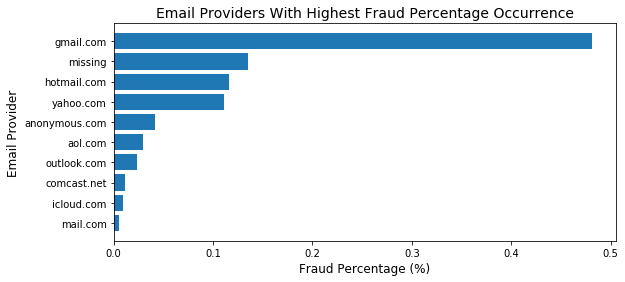

In [25]:
# email fraud percentage
# "but the email ratio is this..." 
plt.subplots(figsize=(9, 4))
plt.title('Email Providers With Highest Fraud Percentage Occurrence', fontsize=14)
plt.ylabel('Email Provider', fontsize=12)
plt.xlabel('Fraud Percentage (%)', fontsize=12)
plt.barh(df_em_perc_fraud.index_email, df_em_perc_fraud.email_percent_fraud)
plt.show()

### Email Provider by Fraud Ratio

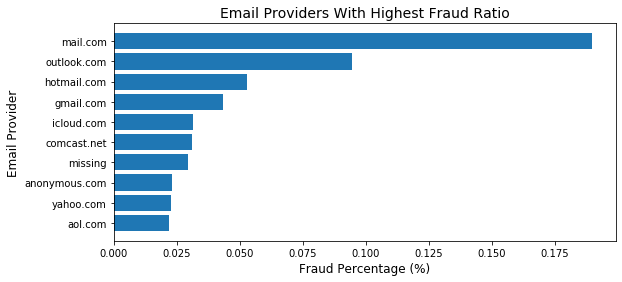

In [26]:
# email fraud ratio
plt.subplots(figsize=(9, 4))
plt.title('Email Providers With Highest Fraud Ratio', fontsize=14)
plt.ylabel('Email Provider', fontsize=12)
plt.xlabel('Fraud Percentage (%)', fontsize=12)
plt.barh(df_em_ratio.index_email, df_em_ratio.email_fraud_ratio)
plt.show()

### Binning Email Providers

#### Creating Dataframes

In [27]:
df_email_total = df_eda.P_emaildomain.value_counts().reset_index()
df_email_total = df_email_total.rename(columns={'P_emaildomain':'email_count',
                                                'index':'index_email'})
df_uncommon_emails = df_email_total[(df_email_total.index_email != 'gmail.com')
                                     & (df_email_total.index_email != 'yahoo.com')
                                     & (df_email_total.index_email != 'hotmail.com')
                                     & (df_email_total.index_email != 'anonymous.com')
                                     & (df_email_total.index_email != 'aol.com')
                                  ]

df_email_eda = df_email_eda.sort_values('email_total', ascending=False)
df_uncommon_email = df_email_eda[(df_email_eda.index_email != 'gmail.com')
                                     & (df_email_eda.index_email != 'yahoo.com')
                                     & (df_email_eda.index_email != 'hotmail.com')
                                     & (df_email_eda.index_email != 'anonymous.com')
                                     & (df_email_eda.index_email != 'aol.com')
                                  ]
df_common_email = df_email_eda.head(5)

# create other providers row (binning)
val_total_notfraud = np.sum(df_uncommon_email.email_notfraud_count)
val_total_fraud = np.sum(df_uncommon_email.email_fraud_count)
val_total_email = np.sum(df_uncommon_email.email_total)
val_percent_fraud = val_total_fraud / val_total_email
val_ratio_fraud = val_total_fraud / val_total_notfraud
# create new row
series_index = pd.Series('other providers', name='index_email')
series_notfraud = pd.Series(val_total_notfraud, name='email_notfraud_count')
series_fraud = pd.Series(val_total_fraud, name='email_fraud_count')
series_perc = pd.Series(val_percent_fraud, name='email_percent_fraud')
series_ratio = pd.Series(val_ratio_fraud, name='email_fraud_ratio')
series_total = pd.Series(val_total_email, name='email_total')
# add results to top 5 dataframe
df_small_em_providers = pd.concat([series_index, series_notfraud, series_fraud, 
                                   series_total, series_perc, series_ratio], axis=1)

df_top5_all = pd.concat([df_common_email, df_small_em_providers], axis=0)
df_top5_all = df_top5_all.set_index('index_email')

# dataframes to use for EDA
df_top5_count = df_top5_all.sort_values('email_total', ascending=True)

df_top5_perc = df_top5_all.reindex(index = ['anonymous.com','hotmail.com','missing',
                                            'yahoo.com','other providers','gmail.com'])

df_top5_ratio = df_top5_all.sort_values('email_fraud_ratio', ascending=True)

### Binning Top Email Providers

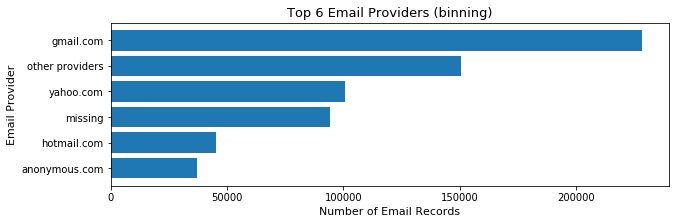

In [28]:
# top 5 email count 
plt.subplots(figsize=(10, 3))
plt.title('Top 6 Email Providers (binning)', fontsize=13)
plt.ylabel('Email Provider', fontsize=11)
plt.xlabel('Number of Email Records', fontsize=11)
plt.barh(df_top5_count.index, df_top5_count.email_total)
plt.show()

### Email Providers by Fraud Percentage

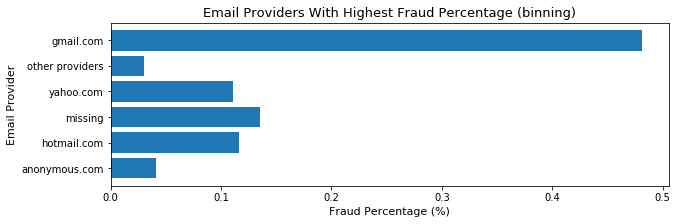

In [29]:
# top 5 highest fraud percent
plt.subplots(figsize=(10, 3))
plt.title('Email Providers With Highest Fraud Percentage (binning)', fontsize=13)
plt.ylabel('Email Provider', fontsize=11)
plt.xlabel('Fraud Percentage (%)', fontsize=11)
plt.barh(df_top5_perc.index, df_top5_perc.email_percent_fraud)
plt.show()

### Email Providers By Fraud Ratio

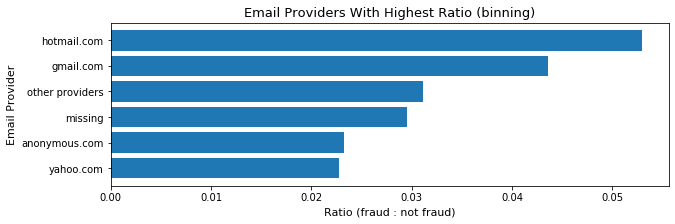

In [30]:
# top 5 highest ratio
plt.subplots(figsize=(10, 3))
plt.title('Email Providers With Highest Ratio (binning)', fontsize=13)
plt.ylabel('Email Provider', fontsize=11)
plt.xlabel('Ratio (fraud : not fraud)', fontsize=11)
plt.barh(df_top5_ratio.index, df_top5_ratio.email_fraud_ratio)
plt.show()

## Transactions By Card Type

#### Creating Dataframes

In [31]:
# not fraud dataframe
df_card6_notfraud = df_eda[df_eda.isFraud==0].card6
df_card6_notfraud = df_card6_notfraud.value_counts()
df_card6_notfraud = df_card6_notfraud.reset_index()
df_card6_notfraud = df_card6_notfraud.rename(columns={'card6':'card6_notfraud_count',
                                                      'index':'index_card6'})

# fraud dataframe
df_card6_fraud = df_eda[df_eda.isFraud==1].card6
df_card6_fraud = df_card6_fraud.value_counts()
df_card6_fraud = df_card6_fraud.reset_index()
df_card6_fraud = df_card6_fraud.rename(columns={'card6':'card6_fraud_count',
                                                      'index':'index_card6'})

# merging not fraud and fraud dataframes
df_card6_eda = df_card6_notfraud.merge(df_card6_fraud, how='left', on='index_card6')
df_card6_eda = df_card6_eda.fillna(0)
df_card6_eda = df_card6_eda.loc[0:1, :] # keep only debit and credit values

df_card6_eda['card6_total'] = (df_card6_eda['card6_fraud_count']
                             + df_card6_eda['card6_notfraud_count'])
df_card6_eda['card6_percent_fraud'] = df_card6_eda['card6_fraud_count'] / 20663.0
df_card6_eda['card6_fraud_ratio'] = (df_card6_eda['card6_fraud_count'] 
                                   / df_card6_eda['card6_total'])

# card6 total dataframe
df_card6_total = df_card6_eda.sort_values('card6_total', ascending=False)
df_card6_total = df_card6_total.head(20)
df_card6_total = df_card6_total.sort_values('card6_total', ascending=True)
# card6 fraud percentage dataframe
df_card6_perc_fraud = df_card6_eda.sort_values('card6_percent_fraud', ascending=False)
df_card6_perc_fraud = df_card6_perc_fraud.head(20)
df_card6_perc_fraud = df_card6_perc_fraud.sort_values('card6_percent_fraud', ascending=True)
# card6 fraud ratio dataframe
df_card6_ratio = df_card6_eda.sort_values('card6_fraud_ratio', ascending=False)
df_card6_ratio = df_card6_ratio.head(20)
df_card6_ratio = df_card6_ratio.sort_values('card6_fraud_ratio', ascending=True)

### Total Debit and Credit Transactions

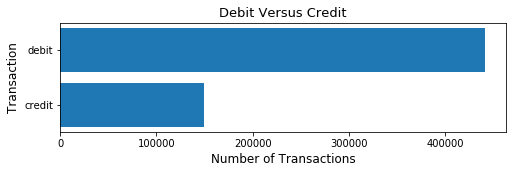

In [32]:
# credit/debit all
plt.subplots(figsize=(8, 2))
plt.title('Debit Versus Credit', fontsize=13)
plt.ylabel('Transaction', fontsize=12)
plt.xlabel('Number of Transactions', fontsize=12)
plt.barh(df_card6_total.index_card6, df_card6_total.card6_total)
plt.show()

### Debit Versus Credit Fraud Percentage

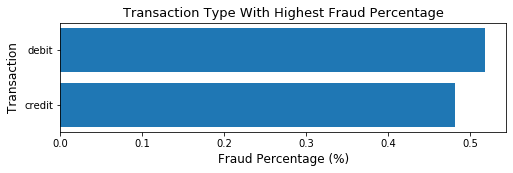

In [33]:
# credit/debit fraud percentage
plt.subplots(figsize=(8, 2))
plt.title('Transaction Type With Highest Fraud Percentage', fontsize=13)
plt.ylabel('Transaction', fontsize=12)
plt.xlabel('Fraud Percentage (%)', fontsize=12)
plt.barh(df_card6_perc_fraud.index_card6, df_card6_perc_fraud.card6_percent_fraud)
plt.show()

### Debit Versus Credit Fraud Ratio

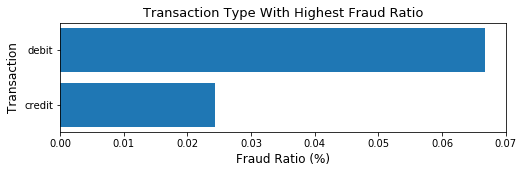

In [34]:
# credit/debit fraud ratio
plt.subplots(figsize=(8, 2))
plt.title('Transaction Type With Highest Fraud Ratio', fontsize=13)
plt.ylabel('Transaction', fontsize=12)
plt.xlabel('Fraud Ratio (%)', fontsize=12)
plt.barh(df_card6_ratio.index_card6.sort_values(), df_card6_ratio.card6_fraud_ratio)
plt.show()

## Transactions by Address

#### Creating Dataframes

In [35]:
# not fraud dataframe
df_addr1_notfraud = df_eda[df_eda.isFraud==0].addr1
df_addr1_notfraud = df_addr1_notfraud.value_counts()
df_addr1_notfraud = df_addr1_notfraud.reset_index()
df_addr1_notfraud = df_addr1_notfraud.rename(columns={'addr1':'addr1_notfraud_count',
                                                      'index':'index_addr1'})
df_addr1_notfraud.index_addr1 = df_addr1_notfraud.index_addr1.astype(str)

# fraud dataframe
df_addr1_fraud = df_eda[df_eda.isFraud==1].addr1
df_addr1_fraud = df_addr1_fraud.value_counts()
df_addr1_fraud = df_addr1_fraud.reset_index()
df_addr1_fraud = df_addr1_fraud.rename(columns={'addr1':'addr1_fraud_count',
                                                      'index':'index_addr1'})
df_addr1_fraud.index_addr1 = df_addr1_notfraud.index_addr1.astype(str)

# merging not fraud and fraud dataframes
df_addr1_eda = df_addr1_notfraud.merge(df_addr1_fraud, how='left', on='index_addr1')
df_addr1_eda = df_addr1_eda.fillna(0)
df_addr1_eda.loc[0, 'index_addr1'] = 'missing'
df_addr1_eda['addr1_total'] = (df_addr1_eda['addr1_fraud_count']
                             + df_addr1_eda['addr1_notfraud_count'])
df_addr1_eda['addr1_percent_fraud'] = df_addr1_eda['addr1_fraud_count'] / 20663.0
df_addr1_eda['addr1_fraud_ratio'] = (df_addr1_eda['addr1_fraud_count'] 
                                   / df_addr1_eda['addr1_total'])

# email total dataframe
df_addr1_total = df_addr1_eda.sort_values('addr1_total', ascending=False)
df_addr1_total = df_addr1_total.head(10)
df_addr1_total = df_addr1_total.sort_values('addr1_total', ascending=True)
# email fraud percentage dataframe
df_addr1_perc_fraud = df_addr1_eda.sort_values('addr1_percent_fraud', ascending=False)
df_addr1_perc_fraud = df_addr1_perc_fraud.head(10)
df_addr1_perc_fraud = df_addr1_perc_fraud.sort_values('addr1_percent_fraud', ascending=True)
# email fraud ratio  dataframe
df_addr1_ratio = df_addr1_eda.sort_values('addr1_fraud_ratio', ascending=False)
df_addr1_ratio = df_addr1_ratio.head(10)
df_addr1_ratio = df_addr1_ratio.sort_values('addr1_fraud_ratio', ascending=True)

### Top 10 Addresses

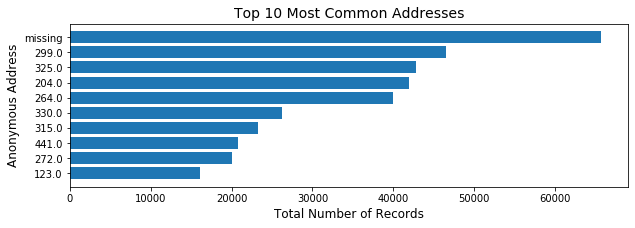

In [36]:
plt.subplots(figsize=(10, 3))
plt.title('Top 10 Most Common Addresses', fontsize=14)
plt.ylabel('Anonymous Address', fontsize=12)
plt.xlabel('Total Number of Records', fontsize=12)
plt.barh(df_addr1_total.index_addr1, df_addr1_total.addr1_total)
plt.show()

### Address by Fraud Percentage

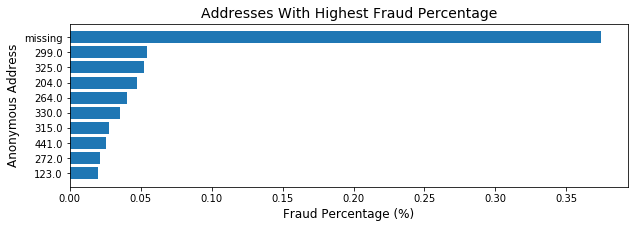

In [37]:
plt.subplots(figsize=(10, 3))
plt.title('Addresses With Highest Fraud Percentage', fontsize=14)
plt.ylabel('Anonymous Address', fontsize=12)
plt.xlabel('Fraud Percentage (%)', fontsize=12)
plt.barh(df_addr1_perc_fraud.index_addr1, df_addr1_perc_fraud.addr1_percent_fraud)
plt.show()

### Address by Fraud Ratio

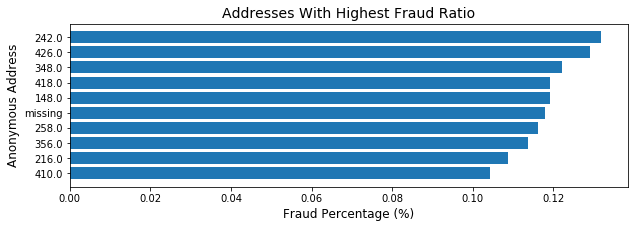

In [38]:
plt.subplots(figsize=(10, 3))
plt.title('Addresses With Highest Fraud Ratio', fontsize=14)
plt.ylabel('Anonymous Address', fontsize=12)
plt.xlabel('Fraud Percentage (%)', fontsize=12)
plt.barh(df_addr1_ratio.index_addr1, df_addr1_ratio.addr1_fraud_ratio)
plt.show()

## Transactions By Product Category

### Creating Dataframe

In [39]:
df_product_cd_notfraud = df_eda[df_eda.isFraud==0].ProductCD.sort_values(ascending=False)
df_product_cd_fraud = df_eda[df_eda.isFraud==1].ProductCD.sort_values(ascending=False)

### Transactions By Product Type - Not Fraudulent

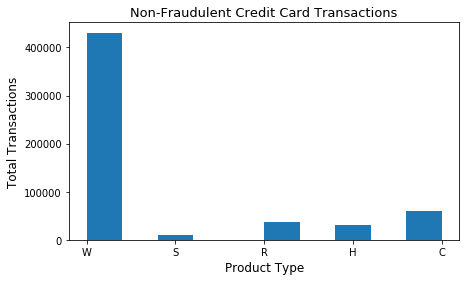

In [40]:
plt.subplots(figsize=(7, 4))
plt.title("Non-Fraudulent Credit Card Transactions", fontsize=13)
plt.ylabel('Total Transactions', fontsize=12)
plt.xlabel('Product Type', fontsize=12)
plt.hist(df_product_cd_notfraud)
plt.show()

### Transactions By Product Type - Fraudulent

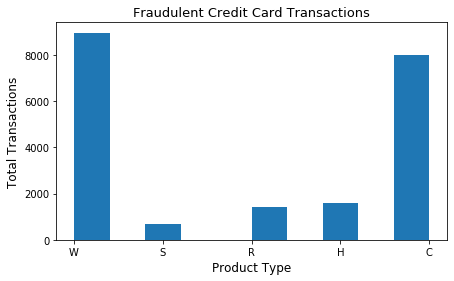

In [41]:
plt.subplots(figsize=(7, 4))
plt.title("Fraudulent Credit Card Transactions", fontsize=13)
plt.ylabel('Total Transactions', fontsize=12)
plt.xlabel('Product Type', fontsize=12)
plt.hist(df_product_cd_fraud)
plt.show()

## Transaction by Transaction Amount ($)

#### Creating Dataframe

In [42]:
# EDA TransactionAmt
df_transactionamt_not_fraud = df_eda[df_eda.isFraud==0].TransactionAmt
df_transactionamt_fraud = df_eda[df_eda.isFraud==1].TransactionAmt

### Transaction Amount - Not Fraudulent

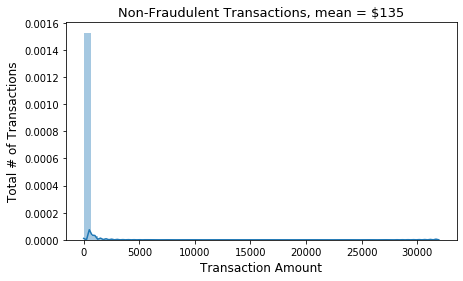

In [43]:
plt.subplots(figsize=(7,4))
sns.distplot(df_transactionamt_not_fraud)
plt.title('Non-Fraudulent Transactions, mean = $135', fontsize=13)
plt.ylabel('Total # of Transactions', fontsize=12)
plt.xlabel('Transaction Amount', fontsize=12)
plt.show()

### Transaction Amount - Fraudulent

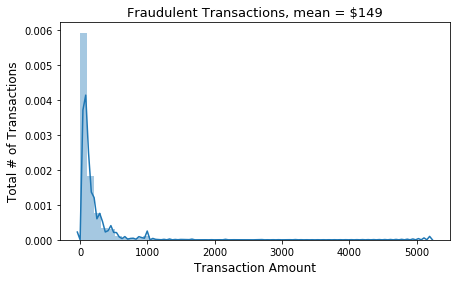

In [44]:
plt.subplots(figsize=(7,4))
sns.distplot(df_transactionamt_fraud)
plt.title('Fraudulent Transactions, mean = $149', fontsize=13)
plt.ylabel('Total # of Transactions', fontsize=12)
plt.xlabel('Transaction Amount', fontsize=12)
plt.show()

## Heatmap

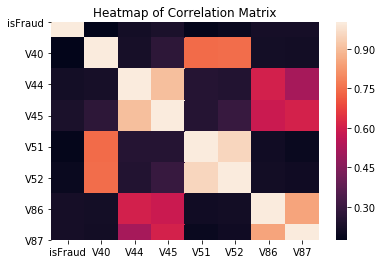

In [46]:
fraud_summary = df_features.groupby('isFraud')
fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_summary.csv')

corr = df_features.corr()
corr.to_csv('/Users/krahman/work/fraud_detection/saved_files/corr_matrix.csv')
corr2 = corr[corr['isFraud']>.17]
corr2 = corr2.loc[:,corr2.index]

sns.heatmap(corr2,
           xticklabels=corr2.columns.values,
           yticklabels=corr2.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show()